**Importacion de paqueterias**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Para la division del modelo
from sklearn.model_selection import train_test_split

In [ ]:
#Para el metodo de convertir los datos de objects a ints
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

In [ ]:
#Para la ejecucion del modelo
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from joblib import Parallel, delayed, cpu_count
from sklearn import metrics

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

In [ ]:
from xgboost import XGBRFRegressor
import xgboost

**Importacion de datos**

In [ ]:
data=pd.read_csv("ozono.csv")
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       8753 non-null   object
 1   Hora        8753 non-null   int64 
 2   O3          8753 non-null   object
 3   Viento_vel  8753 non-null   object
 4   Viento_dir  8753 non-null   object
 5   Tem         8753 non-null   object
 6   Hr          8753 non-null   object
dtypes: int64(1), object(6)
memory usage: 478.8+ KB


**Preprocesamiento**

In [ ]:
data=data.replace("na",np.nan)
data=data.dropna(axis=0)

data['O3']=pd.to_numeric(data['O3'],errors="coerce")
data['Viento_vel']=pd.to_numeric(data['Viento_vel'],errors="coerce")
data['Viento_dir']=pd.to_numeric(data['Viento_dir'],errors="coerce")
data['Tem']=pd.to_numeric(data['Tem'],errors="coerce")
data['Hr']=pd.to_numeric(data['Hr'],errors="coerce")

data=data.drop(["Fecha",],axis=1) #Hice el pequeño ajuste de eliminar la fecha para fines practicos

In [ ]:
# Exploración inicial
print(data.head())
print(data.info())
print(data.describe())

   Hora  O3  Viento_vel  Viento_dir  Tem  Hr
0     1   2         0.3          66   13  68
1     2   2         0.0          37   13  69
2     3   2         0.1         100   12  73
3     4   2         0.2          60   12  75
4     5   3         0.4          95   11  78
<class 'pandas.core.frame.DataFrame'>
Index: 5554 entries, 0 to 8718
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Hora        5554 non-null   int64  
 1   O3          5554 non-null   int64  
 2   Viento_vel  5554 non-null   float64
 3   Viento_dir  5554 non-null   int64  
 4   Tem         5554 non-null   int64  
 5   Hr          5554 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 303.7 KB
None
              Hora           O3   Viento_vel   Viento_dir          Tem  \
count  5554.000000  5554.000000  5554.000000  5554.000000  5554.000000   
mean     12.704357    30.267375     1.756554   140.836874    18.664926   
std       6.808441    

**Pruebas estadisticas**

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


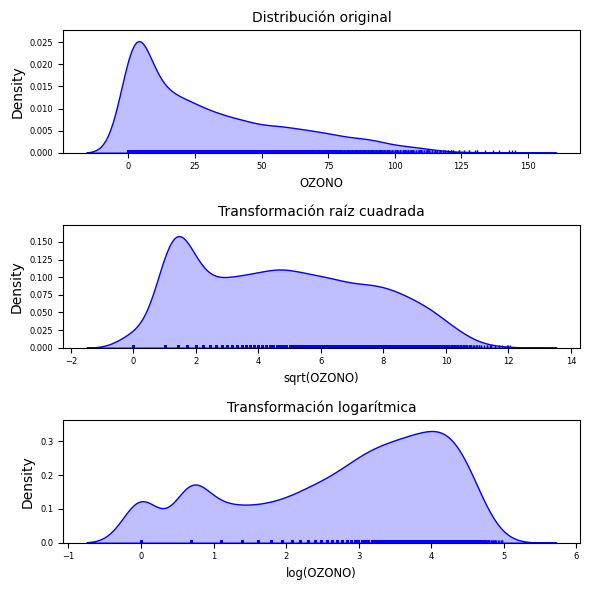

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    data.O3,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    data.O3,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('OZONO', fontsize='small')
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(data.O3),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(data.O3),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(OZONO)', fontsize='small')
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(data.O3),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(data.O3),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(OZONO)', fontsize='small')
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

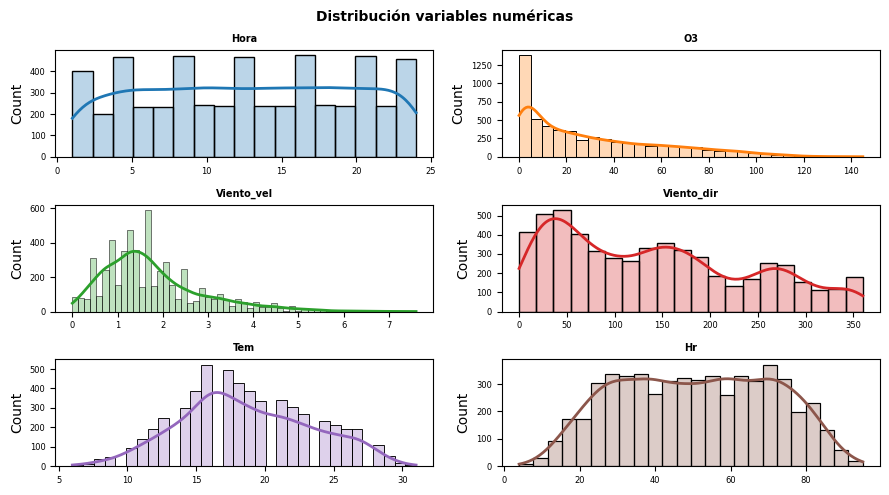

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
#columnas_numeric = columnas_numeric.drop('GAM')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = data,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

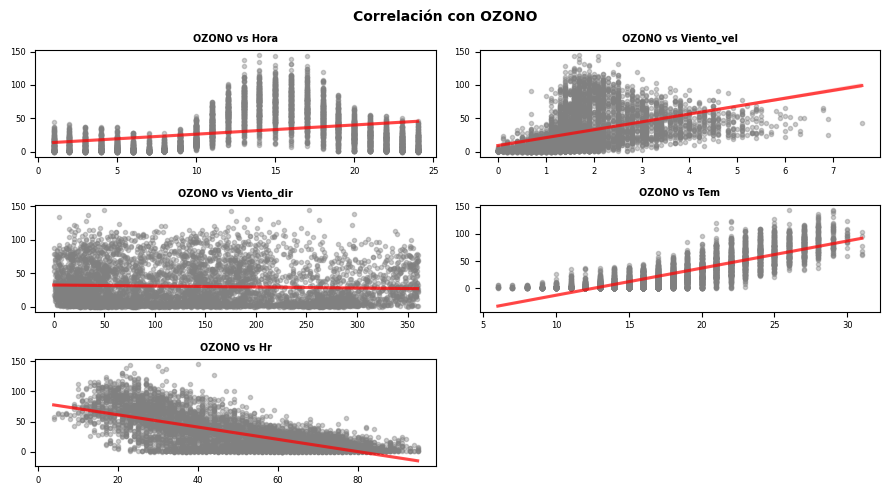

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('O3')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = data[colum],
        y           = data['O3'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"OZONO vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [5]:
    fig.delaxes(axes[i])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con OZONO', fontsize = 10, fontweight = "bold");

<Axes: >

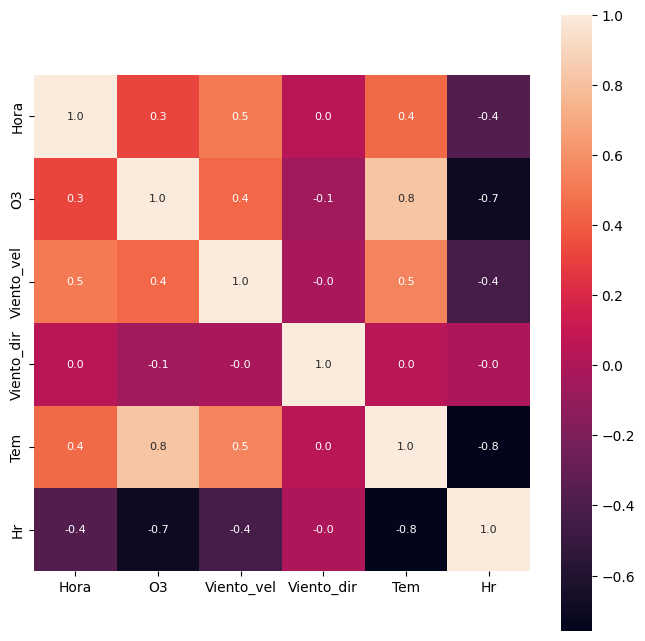

In [ ]:
correlation=data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})

**Random forest**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
                                        data.drop('O3', axis = 'columns'),
                                        data['O3'],
                                        train_size   = 0.8,
                                        random_state = 42,
                                        shuffle      = True
                                    )

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    4443.000000
mean       30.312176
std        29.607784
min         0.000000
25%         4.000000
50%        21.000000
75%        49.000000
max       145.000000
Name: O3, dtype: float64


In [ ]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    1111.000000
mean       30.088209
std        28.690950
min         0.000000
25%         6.000000
50%        21.000000
75%        46.500000
max       139.000000
Name: O3, dtype: float64


In [ ]:
modelo1 = RandomForestRegressor(
            n_estimators = 146,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 2,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 132
         )


modelo1.fit(X_train, y_train)

RandomForestRegressor(max_features=2, n_estimators=146, n_jobs=-1,
                      random_state=132)

In [ ]:
score = modelo1.score(X_test, y_test)
print(f'R^2 score: {score}')

R^2 score: 0.8900813258691129


In [ ]:
modelo2 = XGBRFRegressor(
            n_estimators=1000,max_depth=20
        )

In [ ]:
modelo2.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=20, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=1000, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
predicciones = modelo2.predict(X_test)

score_1 = modelo2.score(X_test, y_test)
print(f'R^2 score: {score_1}')

R^2 score: 0.8848637488541238


In [ ]:
y_pred1=modelo1.predict(X_test)
y_pred1

array([12.91780822, 49.90410959, 39.06164384, ..., 25.88356164,
       13.57534247,  7.4109589 ])

In [ ]:
y_pred2=modelo2.predict(X_test)
y_pred2

array([11.142609 , 50.561123 , 42.013027 , ..., 26.545456 , 16.016706 ,
        4.8930144], dtype=float32)

In [ ]:
y_test_list=list(y_test)

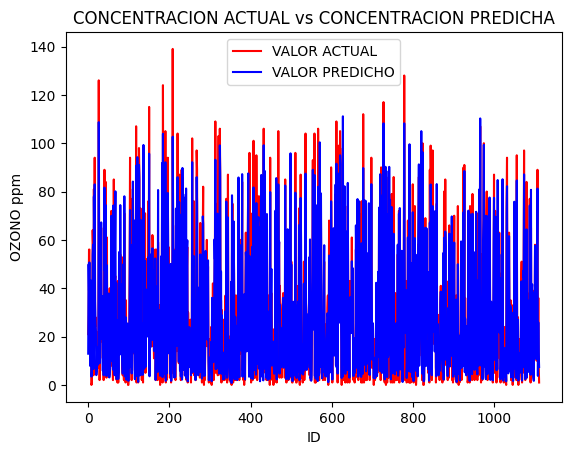

R squared error :  0.8900813258691129


In [ ]:
#rf
plt.plot(y_test_list, color='red', label = 'VALOR ACTUAL')
plt.plot(y_pred1, color='blue', label='VALOR PREDICHO')
plt.title('CONCENTRACION ACTUAL vs CONCENTRACION PREDICHA')
plt.xlabel('ID')
plt.ylabel('OZONO ppm')
plt.legend()
plt.show()

error_score = metrics.r2_score(y_test, y_pred1)
print("R squared error : ", error_score)

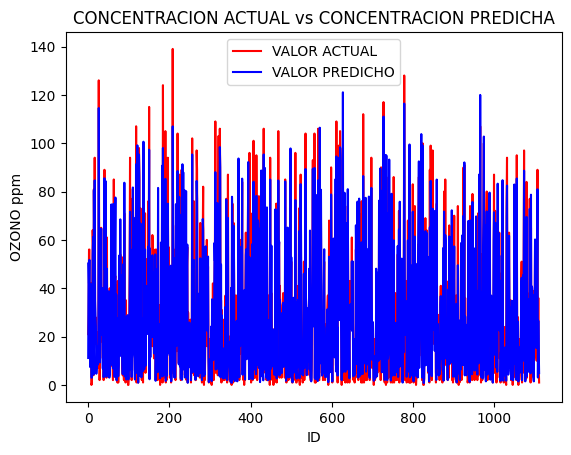

R squared error :  0.8848637488541238


In [ ]:
plt.plot(y_test_list, color='red', label = 'VALOR ACTUAL')
plt.plot(y_pred2, color='blue', label='VALOR PREDICHO')
plt.title('CONCENTRACION ACTUAL vs CONCENTRACION PREDICHA')
plt.xlabel('ID')
plt.ylabel('OZONO ppm')
plt.legend()
plt.show()

error_score = metrics.r2_score(y_test, y_pred2)
print("R squared error : ", error_score)